In [1]:
import sys
sys.path.append("..")
from scripts.aoc import input_as_lines


In [79]:
input_lines = input_as_lines('input.txt')

In [80]:
def movement(head, tail, direction):

    # head movement
    if direction == 'R':
        head = (int(head[0]+1), head[1])
    if direction == 'L':
        head = (int(head[0]-1), head[1])
    if direction == 'D':
        head = (head[0], int(head[1]-1))
    if direction == 'U':
        head = (head[0], int(head[1]+1))
    if direction == 'n/a':
        pass

    # if both head and tale are too far apart:
    if abs(tail[0]-head[0]) > 1 and abs(tail[1]-head[1]) > 1:
        tail = (int((tail[0]+head[0])/2), int((tail[1]+head[1])/2)) 
        
    # if head is too far right 
    if abs(tail[0]-head[0]) > 1:
        tail = (int((tail[0]+head[0])/2), head[1])

    # if head is too far up 
    if abs(tail[1]-head[1]) > 1:
        tail = (head[0], int((tail[1]+head[1])/2))
        
    return head, tail

In [81]:
cache = set()
head = (0, 0)
tail = (0, 0)

for line in input_lines:
    direction, steps = line.split(" ")
    steps = int(steps)
    
    for step in range(1, steps+1):
        
        head, tail = movement(head, tail, direction)
        cache.add(tail)

In [82]:
len(cache)

6498

### part 2

In [83]:
import time
from collections import defaultdict
cache = set()


# initiate rope
rope = defaultdict(tuple)
for i in range(1, 11):
    rope[i] = (0, 0)

for line in input_lines:
    direction, steps = line.split(" ")
    steps = int(steps)
    
    for step in range(1, steps+1):
        # first do the head
        rope[1], _ = movement(rope[1], rope[2], direction)
        
        # let everything else follow
        for i in range(1,10):
            _, rope[i+1] = movement(rope[i], rope[i+1], 'n/a')
          
        cache.add(rope[10])

plt.show()

In [86]:
len(cache)

2531

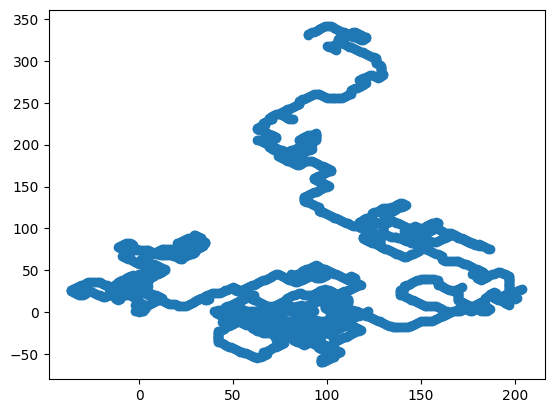

In [85]:
# !pip install matplotlib
import matplotlib.pyplot as plt

x = [item[0] for item in list(cache)]
y = [item[1] for item in list(cache)]
plt.scatter(x,y)